In [76]:
# automatically reload external python files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
from sklearn.model_selection import train_test_split

from utils import (
    read_transactions, 
    read_frequent_sets, 
    write_transactions, 
    split_transactions2, 
    association_rules,
    calculate_rules_dict,
    plot_results,
    evaluate_recommendations,
    sample_recommendations,
    run_experiment
)
from recommenders import *

# Data preprocessing

In the following code block, the retail dataset is read and interactions with a single item are removed. Then, the dataset is plit into a training and test set, which are both written to a text file. The training set is 70% of the data.

The test transactions are then further partitioned 50-50 into test and validation parts. Both these transaction sets are then turned into test data by removing transactions with fewer than 7 items and selecting 3 items which need to be predicted.

In [5]:
# def prepare_data():
#     # read file
#     transactions = read_transactions('data/retail.dat')

#     # filter out transactions containing only a single items
#     transactions = [t for t in transactions if len(t) > 1]

#     # split into training and test set
#     train, test = train_test_split(transactions, test_size=0.3)
#     write_transactions('data/train.txt', train)
#     write_transactions('data/test.txt', test)
    
# prepare_data()

In [3]:
validation_transactions, test_transactions = train_test_split(read_transactions('data/test.txt'), test_size=0.5)

test_data = split_transactions2(test_transactions, leave_out=3, min_items=7)
validation_data = split_transactions2(validation_transactions, leave_out=3, min_items=7)

# Apriori Experiments

In [59]:
results = dict()
results_ndi = dict()

### Popularity

In [64]:
for k in [3, 5, 10]:
    print(
        evaluate_recommendations(
            validation_data, 
            lambda x, n: recommend_popularity(x, None, None, top_n=n), 
            top_n=k
        )[1]
    )

0.14108858953376138
0.1619035628855596
0.18108187502622855


### Average confidence

In [69]:
for k in [3, 5, 10]:
    results[f'average_confidence@{k}'] = run_experiment(
        [25, 50, 75, 100],
        [0.01, 0.05, 0.1, 0.2, 0.3],
        validation_data,
        recommend_average_confidence,
        top_n=k
    )

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

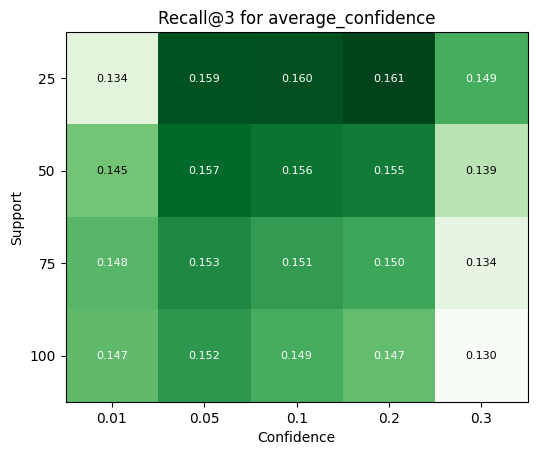

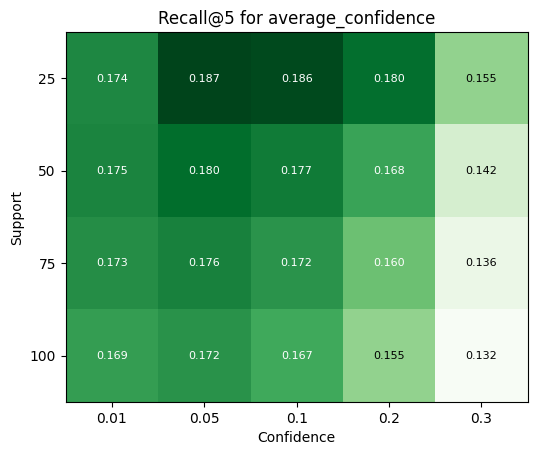

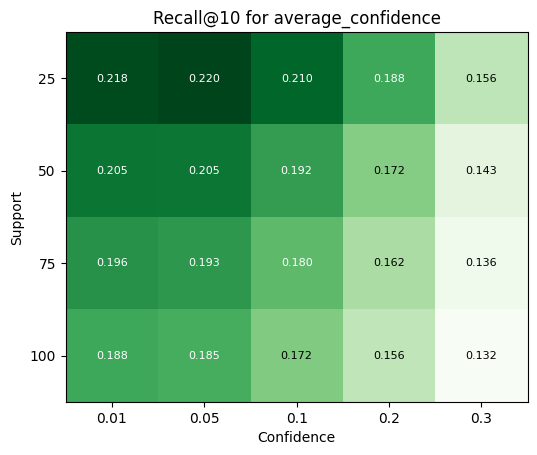

In [81]:
for k in [3, 5, 10]:
    plot_results(results[f'average_confidence@{k}'], f'Recall@{k} for average_confidence')

### Number of rules

In [74]:
for k in [3, 5, 10]:
    results[f'number@{k}'] = run_experiment(
        [25, 50, 75, 100],
        [0.01, 0.05, 0.1, 0.2, 0.3],
        validation_data,
        recommend_number_rules,
        top_n=k
    )

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

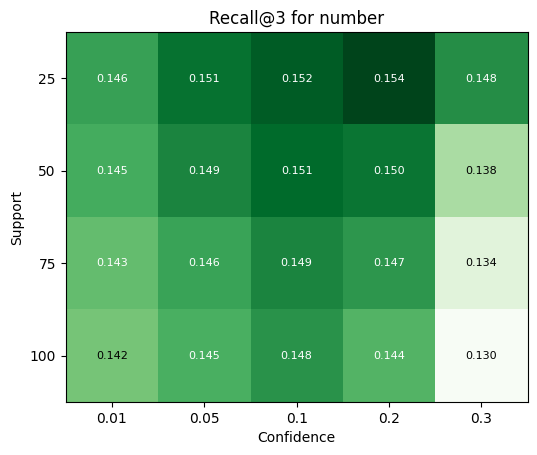

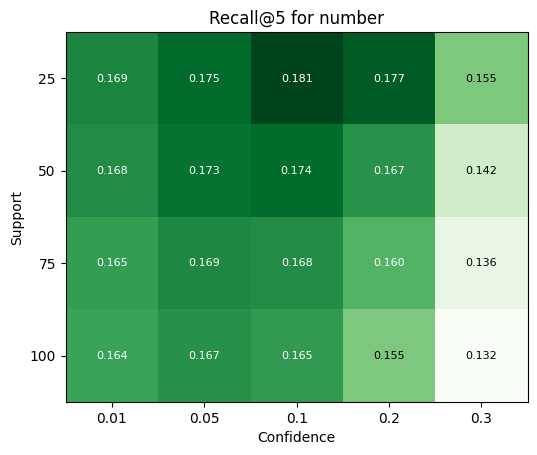

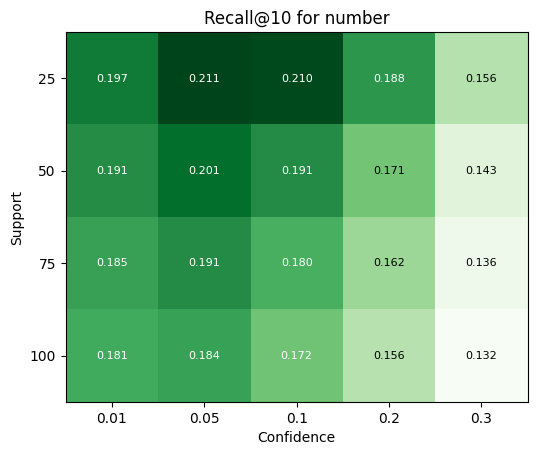

In [78]:
for k in [3, 5, 10]:
    plot_results(results[f'number@{k}'], f'Recall@{k} for number')

### Total support / confidence

In [82]:
for k in [3, 5, 10]:
    results[f'total_support@{k}'] = run_experiment(
        [25],
        [0.05, 0.1, 0.2],
        validation_data,
        recommend_total_support,
        top_n=k
    )
for k in [3, 5, 10]:
    results[f'total_confidence@{k}'] = run_experiment(
        [25],
        [0.05, 0.1, 0.2,],
        validation_data,
        recommend_total_confidence,
        top_n=k
    )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

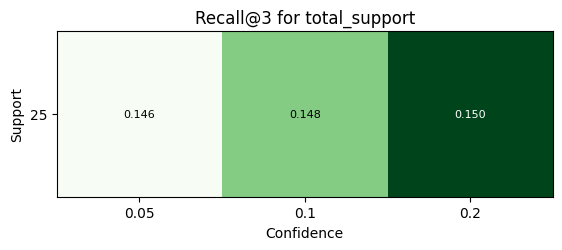

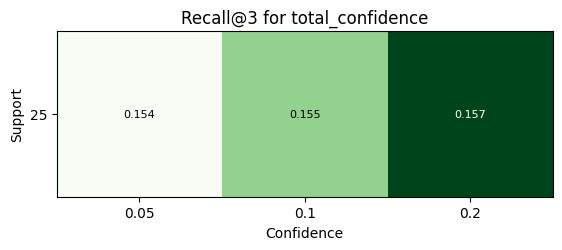

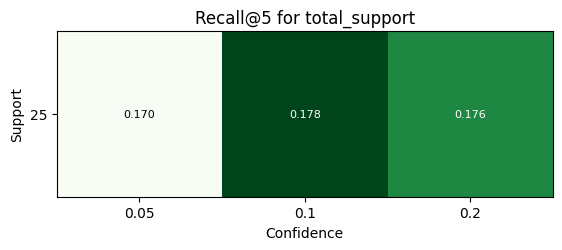

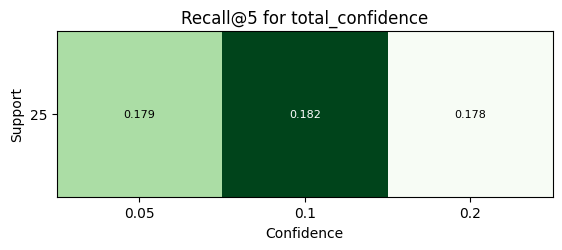

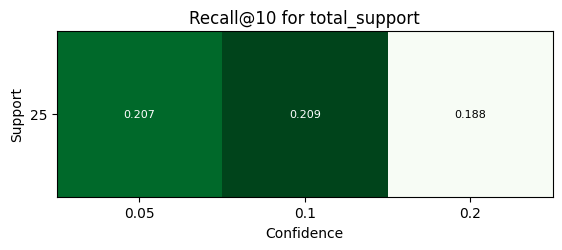

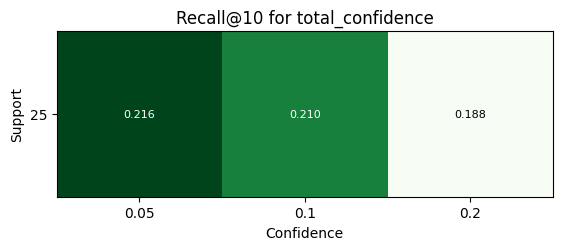

In [83]:
for k in [3, 5, 10]:
    plot_results(results[f'total_support@{k}'], f'Recall@{k} for total_support')
    plot_results(results[f'total_confidence@{k}'], f'Recall@{k} for total_confidence')

### Popularity discount

In [84]:
for k in [3, 5, 10]:
    results[f'pop_discount@{k}'] = run_experiment(
        [25, 50],
        [0.05, 0.1, 0.2, 0.3],
        validation_data,
        recommend_popularity_discount,
        top_n=k
    )

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

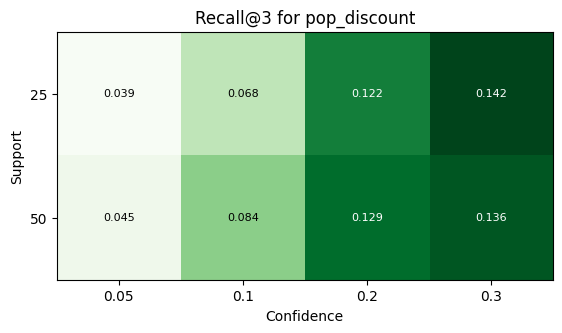

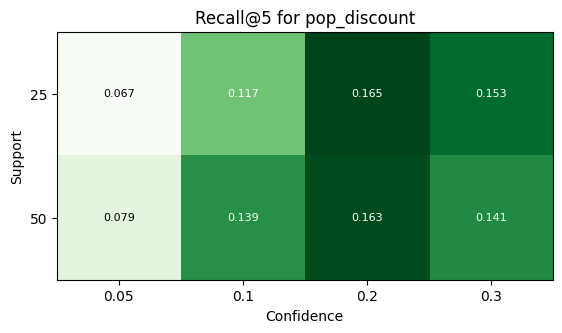

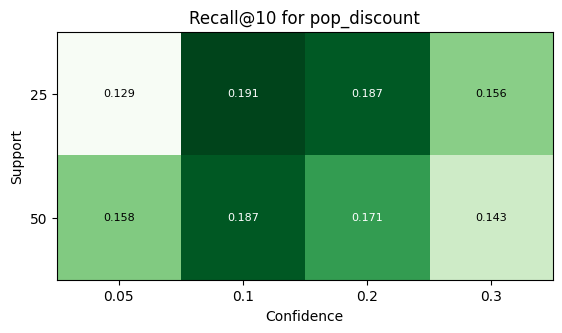

In [85]:
for k in [3, 5, 10]:
    plot_results(results[f'pop_discount@{k}'], f'Recall@{k} for pop_discount')

### Weighted total confidence

In [88]:
for k in [3, 5, 10]:
    results[f'weighted_confidence@{k}'] = run_experiment(
        [25],
        [0.05, 0.1, 0.2, 0.3],
        validation_data,
        recommend_weighted_confidence,
        top_n=k
    )

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

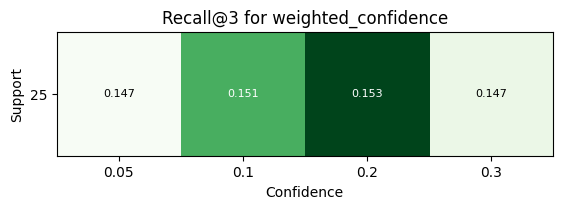

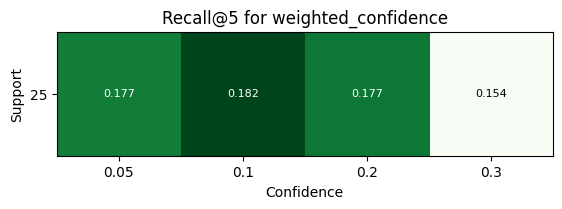

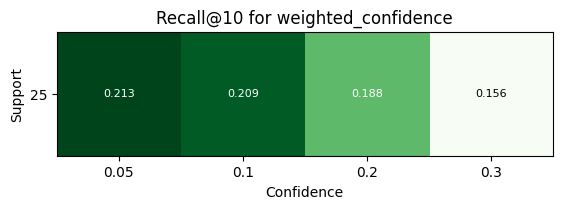

In [89]:
for k in [3, 5, 10]:
    plot_results(results[f'weighted_confidence@{k}'], f'Recall@{k} for weighted_confidence')

# Final results Apriori

Calculate metrics for average confidence on the test dataset with tuned parameters

In [91]:
frequent_sets = read_frequent_sets(f"data/apriori/25.txt")

rules = association_rules(frequent_sets, 0.2)
rules_dict = calculate_rules_dict(rules)
r3 = evaluate_recommendations(
    test_data, 
    lambda x, n: recommend_average_confidence(x, rules, rules_dict, top_n=n), 
    top_n=3
)

rules = association_rules(frequent_sets, 0.05)
rules_dict = calculate_rules_dict(rules)
r5 = evaluate_recommendations(
    test_data, 
    lambda x, n: recommend_average_confidence(x, rules, rules_dict, top_n=n), 
    top_n=5
)
r10 = evaluate_recommendations(
    test_data, 
    lambda x, n: recommend_average_confidence(x, rules, rules_dict, top_n=n), 
    top_n=10
)

r3, r5, r10

((0.16296108076059798, 0.16296108076059798, 0.16296108076059798),
 (0.1127683902934824, 0.187947317155804, 0.140960487866853),
 (0.06650997331978148, 0.22169991106593825, 0.10232303587658689))

# Average Confidence NDI
grid search for average confidence with NDI

In [93]:
for k in [3, 5, 10]:
    results_ndi[f'average_confidence@{k}'] = run_experiment(
        [15, 20, 25, 50, 75, 100],
        [0.01, 0.05, 0.1, 0.2, 0.3],
        validation_data,
        recommend_average_confidence,
        top_n=k,
        ndi=True
    )

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

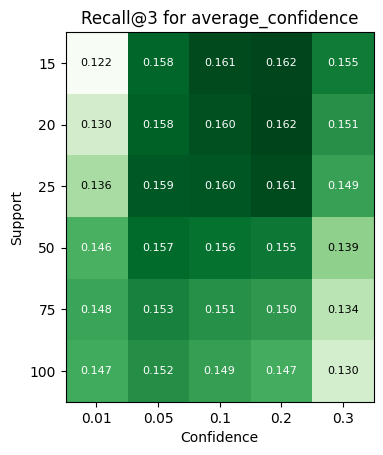

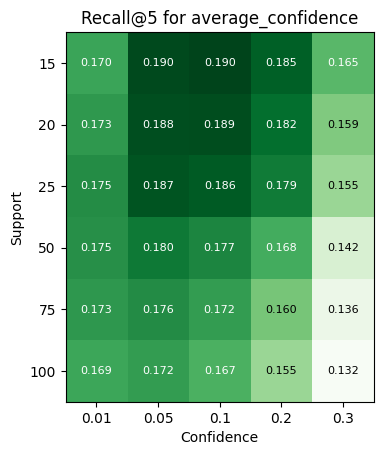

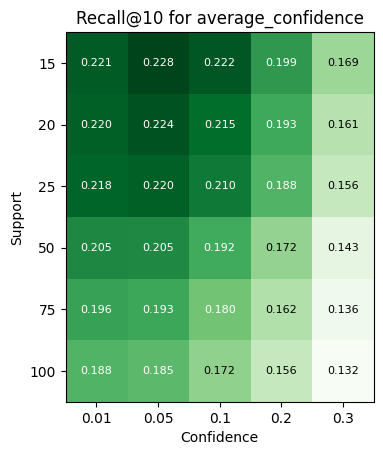

In [94]:
for k in [3, 5, 10]:
    plot_results(results_ndi[f'average_confidence@{k}'], f'Recall@{k} for average_confidence')

# Investigate recommendations and rules

In [90]:
frequent_sets = read_frequent_sets("data/apriori/25.txt")
# frequent_sets = read_frequent_sets("data/ndi/5.txt", ndi=True)

rules = association_rules(frequent_sets, 0.4)
# len([(a, c) for a, c, supp, conf in rules if len(c - {"39","48","38","41","32"}) > 0])
len(rules)

28104

In [99]:
sample_recommendations(25, 0.05, validation_data[:30], recommend_average_confidence, top_n=5)

['48', '38', '32', '225', '65'] {'103', '7050', '811'}
['48', '39', '32', '41', '783'] {'1362', '15659', '12462'}
['4037', '39', '38', '682', '166'] {'102', '39', '38'}
['48', '32', '41', '38', '65'] {'1896', '816', '2890'}
['41', '32', '237', '533', '170'] {'2284', '2505', '1035'}
['32', '36', '110', '170', '89'] {'37', '1417', '2654'}
['48', '32', '41', '38', '65'] {'1146', '32', '3616'}
[] {'7370', '7372', '7371'}
['48', '38', '352', '41', '548'] {'1083', '822', '38'}
['48', '39', '41', '1104', '32'] {'337', '1756', '1387'}
['41', '32', '272', '38', '1333'] {'1312', '32', '3467'}
['32', '41', '38', '65', '123'] {'1277', '269', '1593'}
['48', '41', '32', '38', '65'] {'13362', '2624', '12650'}
['39', '48', '41', '1872', '32'] {'48', '10469', '1659'}
['48', '352', '976', '32', '38'] {'1146', '2320', '161'}
['3856', '39', '41', '32', '170'] {'1309', '110', '3964'}
['41', '32', '2874', '911', '36'] {'319', '2623', '2820'}
['14933', '1609', '48', '41', '32'] {'1277', '32', '2063'}
['10490

## Misc

In [45]:
# get most popular items for popularity recommender
train_transactions = read_transactions('data/train.txt')
item_counts = dict()
for t in train_transactions:
    for i in t:
        if i not in item_counts:
            item_counts[i] = 0
        item_counts[i] += 1
        
sorted_items_counts = sorted(item_counts, key=item_counts.get, reverse=True)
sorted_items_counts[:10]

['39', '48', '38', '41', '32', '65', '89', '225', '170', '237']